Name: Alviya Ali PRN: 24070243005 

In [41]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore

In [13]:
df=pd.read_csv("auto-mpg.csv")
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   mpg           398 non-null    float64 
 1   cylinders     398 non-null    category
 2   displacement  398 non-null    float64 
 3   horsepower    392 non-null    float64 
 4   weight        398 non-null    int64   
 5   acceleration  398 non-null    float64 
 6   model year    398 non-null    int64   
 7   origin        398 non-null    int8    
 8   car name      398 non-null    object  
dtypes: category(1), float64(4), int64(2), int8(1), object(1)
memory usage: 22.9+ KB


In [9]:
df = df.dropna()

In [29]:
df["horsepower"] = pd.to_numeric(df["horsepower"], errors='coerce')
df = df.dropna()

In [25]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


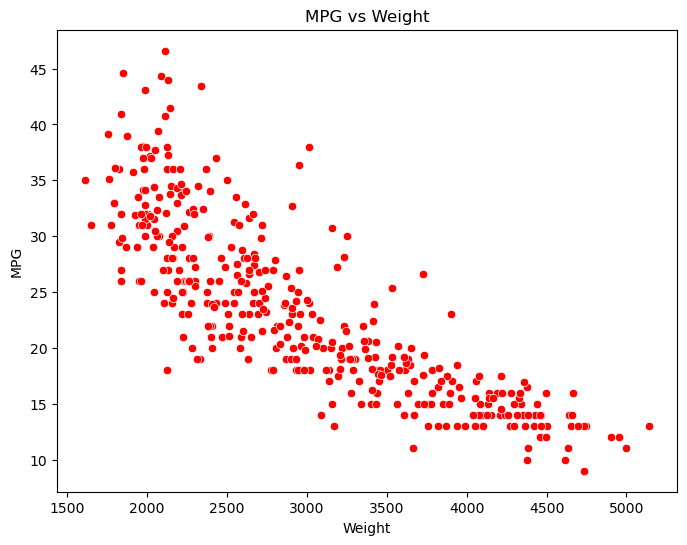

In [15]:
# Scatter plot between mpg and weight
plt.figure(figsize=(8, 6))
sns.scatterplot(x='weight', y='mpg', data=df, color='red')
plt.title('MPG vs Weight')
plt.xlabel('Weight')
plt.ylabel('MPG')
plt.show()

C:\Users\Alviya Ali\AppData\Local\Temp\ipykernel_14300\3643527913.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cylinders', y='mpg', data=df, palette='Set2')


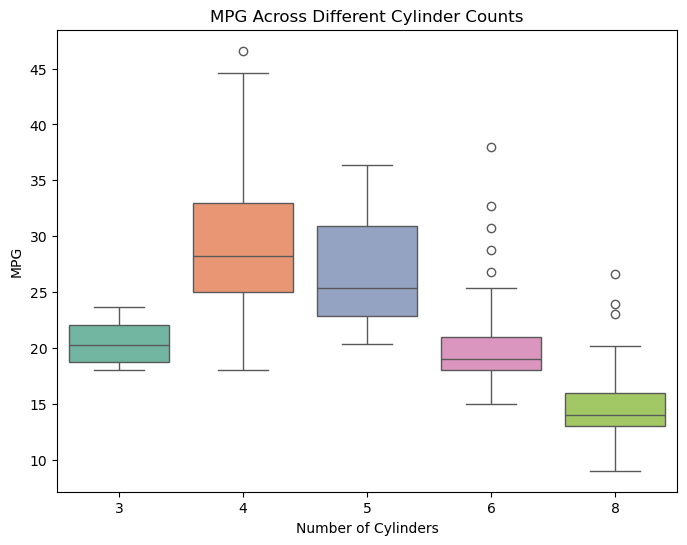

In [27]:
# Boxplot for mpg across cylinders
plt.figure(figsize=(8, 6))
sns.boxplot(x='cylinders', y='mpg', data=df, palette='Set2')
plt.title('MPG Across Different Cylinder Counts')
plt.xlabel('Number of Cylinders')
plt.ylabel('MPG')
plt.show()

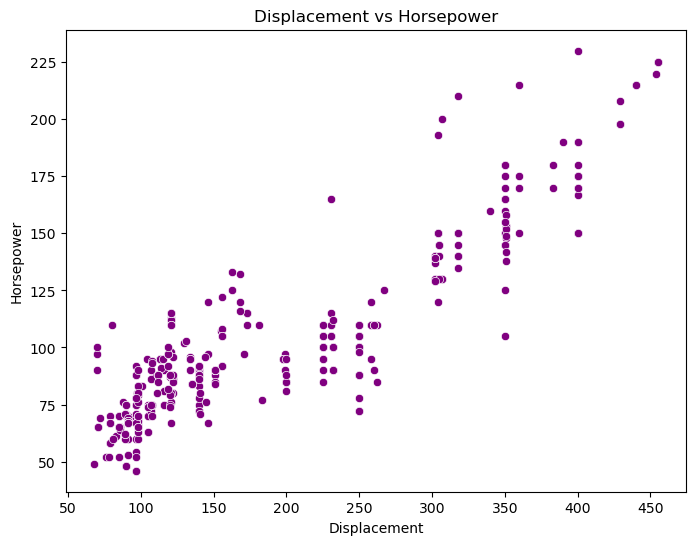

In [29]:
# Scatter plot of displacement vs horsepower
plt.figure(figsize=(8, 6))
sns.scatterplot(x='displacement', y='horsepower', data=df, color='purple')
plt.title('Displacement vs Horsepower')
plt.xlabel('Displacement')
plt.ylabel('Horsepower')
plt.show()

<Figure size 200x200 with 0 Axes>

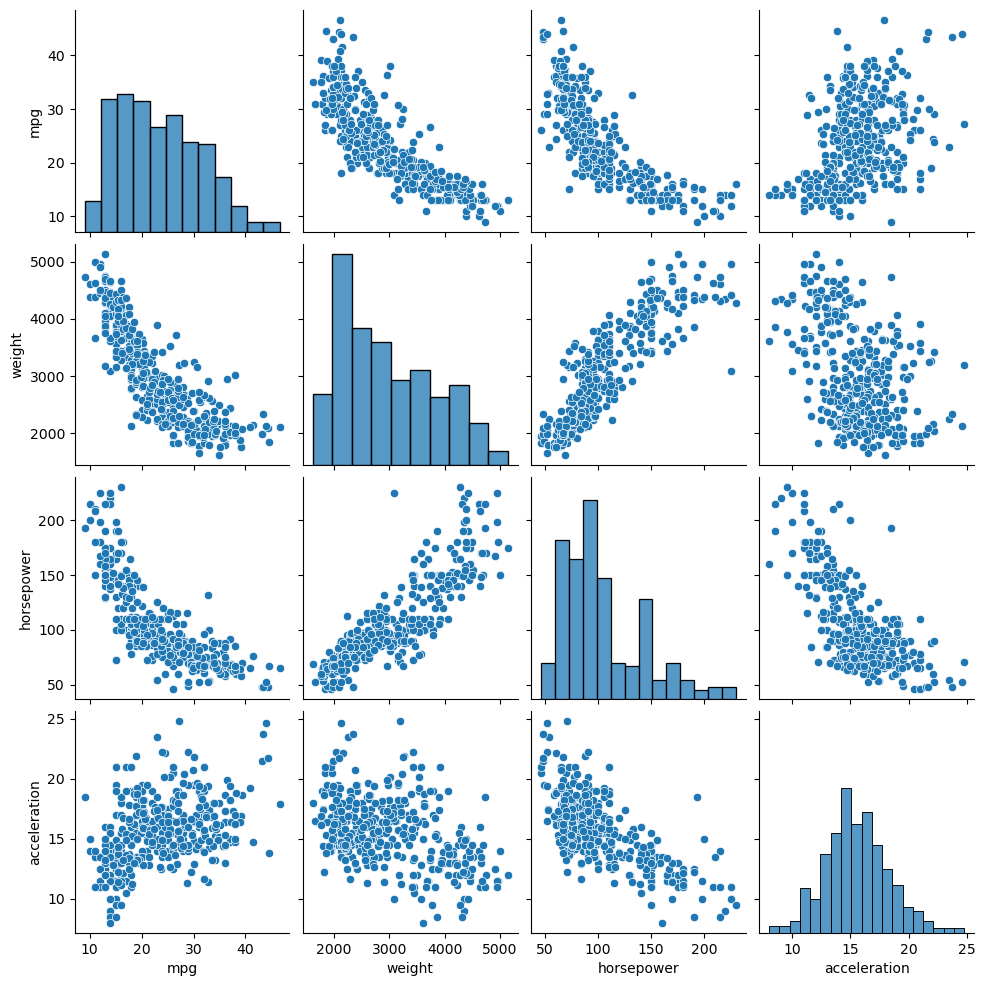

In [91]:
# Pairplot for mpg, weight, horsepower, and acceleration
plt.figure(figsize=(2,2))
sns.pairplot(df[['mpg', 'weight', 'horsepower', 'acceleration']])
plt.show()

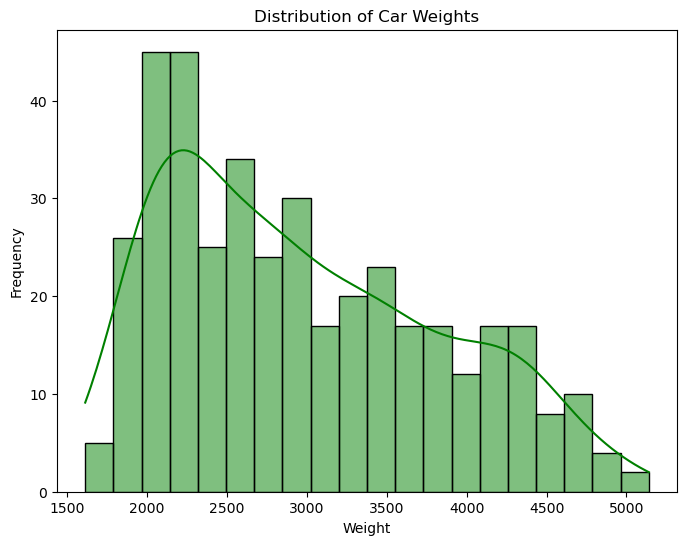

In [33]:
# Histogram for car weight
plt.figure(figsize=(8, 6))
sns.histplot(df['weight'], bins=20, kde=True, color='green')
plt.title('Distribution of Car Weights')
plt.xlabel('Weight')
plt.ylabel('Frequency')
plt.show()

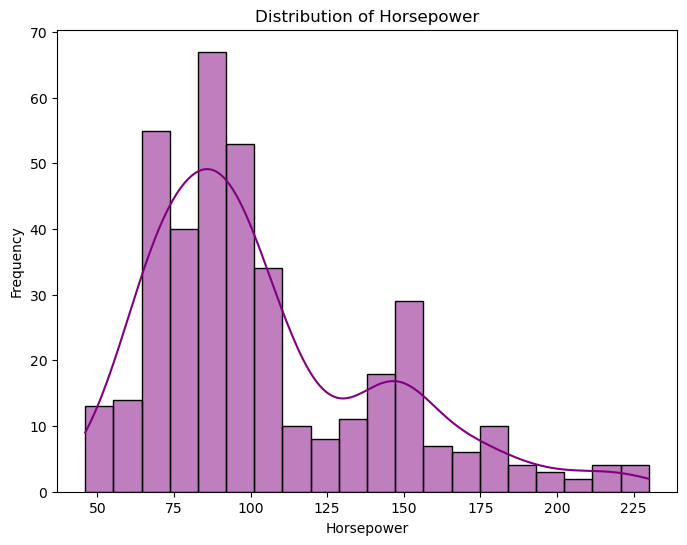

In [45]:
# Histogram for horsepower
plt.figure(figsize=(8, 6))
sns.histplot(df['horsepower'], bins=20, kde=True, color='purple')
plt.title('Distribution of Horsepower')
plt.xlabel('Horsepower')
plt.ylabel('Frequency')
plt.show()

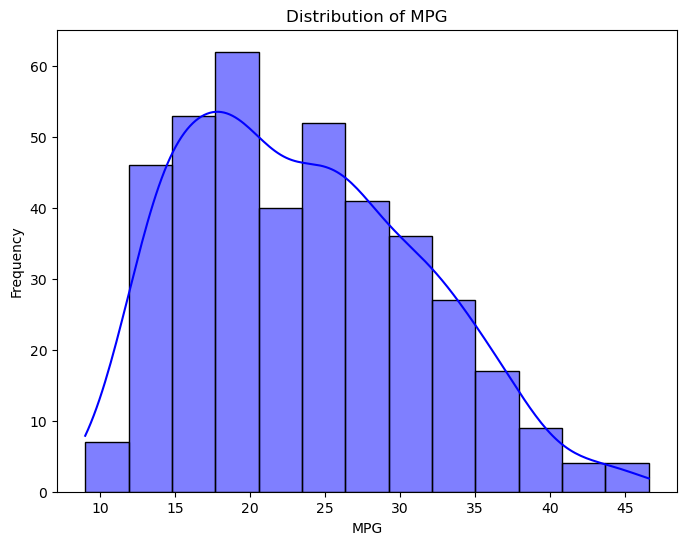

In [47]:
# Distribution of mpg (target variable)
plt.figure(figsize=(8, 6))
sns.histplot(df['mpg'], kde=True, color='blue')
plt.title('Distribution of MPG')
plt.xlabel('MPG')
plt.ylabel('Frequency')
plt.show()

In [79]:
encoded_data = pd.get_dummies(df, drop_first=True)

# Correlation matrix
correlation_matrix = encoded_data.corr()

# Extract correlation of independent variables with the target variable (charges)
correlation_with_target = correlation_matrix['mpg'].sort_values(ascending=False)
print("Correlation with 'mpg':\n", correlation_with_target)

Correlation with 'mpg':
 mpg                          1.000000
model year                   0.580541
origin                       0.565209
acceleration                 0.423329
car name_mazda glc           0.150217
                               ...   
car name_chevrolet impala   -0.136064
cylinders                   -0.777618
horsepower                  -0.778427
displacement                -0.805127
weight                      -0.832244
Name: mpg, Length: 308, dtype: float64


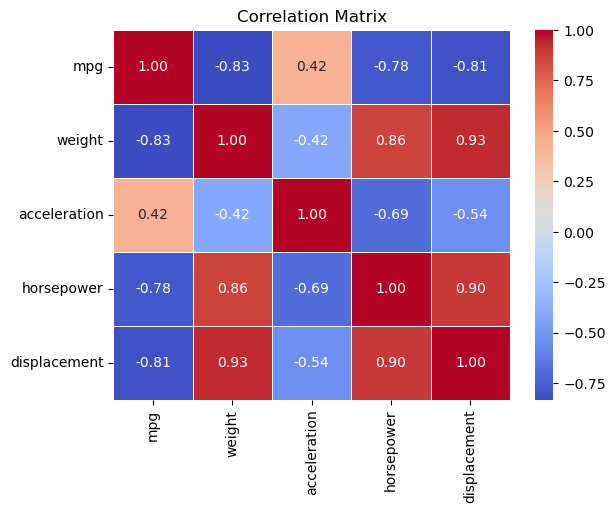

In [83]:
correlation_matrix = df[['mpg','weight', 'acceleration', 'horsepower', 'displacement']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

Mean Squared Error (MSE): 17.69
Root Mean Squared Error (RMSE): 4.21
Mean Absolute Error (MAE): 3.46
Mean Absolute Percentage Error (MAPE): 0.16


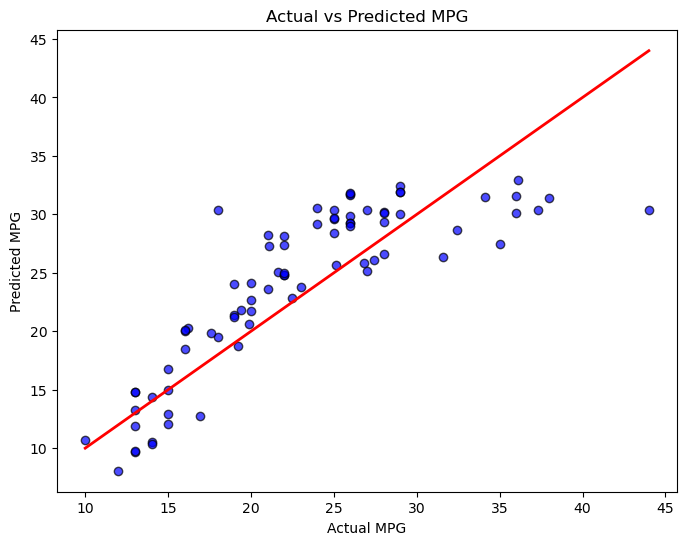

In [67]:
# Select independent variable (weight) and dependent variable (mpg)
X = df[['weight']]  # Independent variable
y = df['mpg']       # Dependent variable
# Split the data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
x_pred = model.predict(X_test)
# Calculate performance metrics
mse = mean_squared_error(y_test, x_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

# Print the metrics
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}")
# Plot actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', edgecolor='black', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)  # Perfect prediction line
plt.title('Actual vs Predicted MPG')
plt.xlabel('Actual MPG')
plt.ylabel('Predicted MPG')
plt.show()|

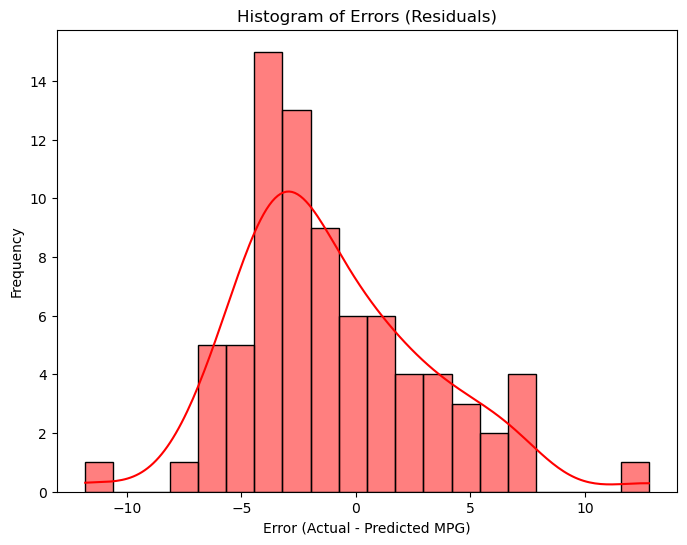

In [37]:
# Calculate the errors (residuals)
errors = y_test - y_pred
# Plot the histogram of errors
plt.figure(figsize=(8, 6))
sns.histplot(errors, kde=True, bins=20, color='green', edgecolor='black')
plt.title('Histogram of Errors (Residuals)')
plt.xlabel('Error (Actual - Predicted MPG)')
plt.ylabel('Frequency')
plt.show()

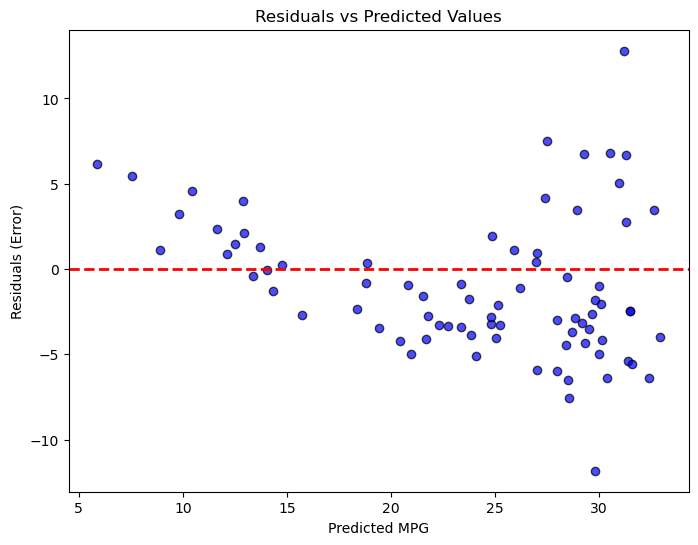

In [39]:
# Plot residuals vs predicted values to check for heteroscedasticity
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, errors, color='blue', edgecolor='black', alpha=0.7)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)  # Horizontal line at zero
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted MPG')
plt.ylabel('Residuals (Error)')
plt.show()

Z-scores of residuals:
 79    -0.757030
276   -0.521551
248    1.101679
56    -1.053735
393    0.521169
Name: mpg, dtype: float64


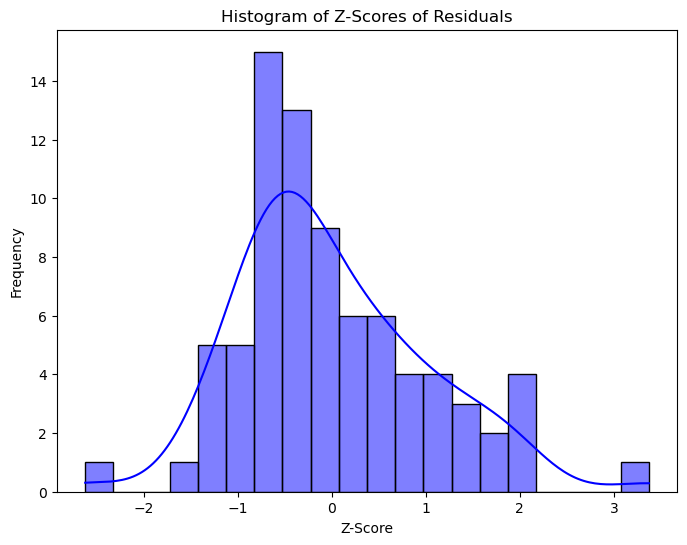

In [47]:
# Calculate residuals (errors)
residuals = y_test - y_pred

# Calculate the mean and standard deviation of residuals
mean_residual = np.mean(residuals)
std_residual = np.std(residuals)

# Calculate the z-scores of residuals
z_scores = (residuals - mean_residual) / std_residual

# Print the first few z-scores to inspect
print("Z-scores of residuals:\n", z_scores.head())
plt.figure(figsize=(8, 6))
sns.histplot(z_scores, kde=True, bins=20, color='blue', edgecolor='black')
plt.title('Histogram of Z-Scores of Residuals')
plt.xlabel('Z-Score')
plt.ylabel('Frequency')
plt.show()

Mean Squared Error (MSE) for Z-Score Model: 0.93
Root Mean Squared Error (RMSE) for Z-Score Model: 0.97
Mean Absolute Error (MAE) for Z-Score Model: 0.71


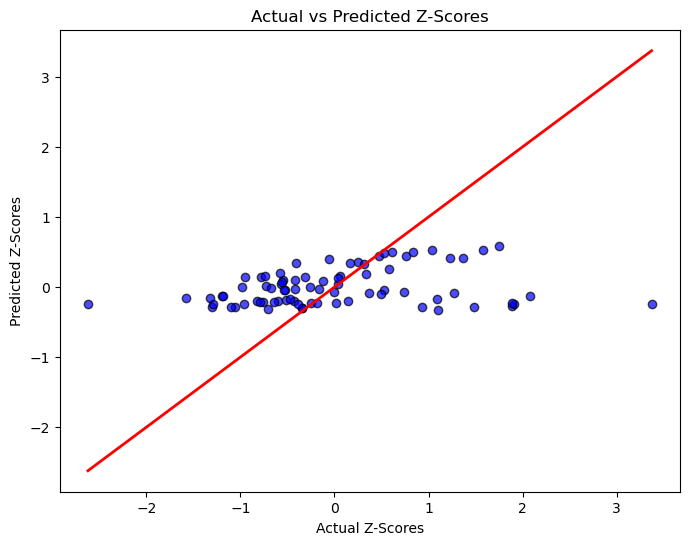

In [49]:
# Step 1: Calculate the residuals (errors)
residuals = y_test - y_pred

# Step 2: Calculate the z-scores of residuals
mean_residual = np.mean(residuals)
std_residual = np.std(residuals)
z_scores = (residuals - mean_residual) / std_residual

# Step 3: Use z-scores as the target variable for the regression model
# For simplicity, we use one independent variable, say 'weight' (from the original model)
X_zscore = X_test[['weight']]  # Independent variable (use 'weight' here)

# Step 4: Split the data for linear regression (We already have the test data in X_test and y_test)
# No need to split again, just use 'X_zscore' and 'z_scores'

# Step 5: Build the simple linear regression model
from sklearn.linear_model import LinearRegression
model_zscore = LinearRegression()

# Fit the model using z-scores as the target
model_zscore.fit(X_zscore, z_scores)

# Step 6: Make predictions
z_pred = model_zscore.predict(X_zscore)

# Step 7: Evaluate the model's performance
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calculate performance metrics
mse_zscore = mean_squared_error(z_scores, z_pred)
rmse_zscore = np.sqrt(mse_zscore)
mae_zscore = mean_absolute_error(z_scores, z_pred)

# Print the metrics
print(f"Mean Squared Error (MSE) for Z-Score Model: {mse_zscore:.2f}")
print(f"Root Mean Squared Error (RMSE) for Z-Score Model: {rmse_zscore:.2f}")
print(f"Mean Absolute Error (MAE) for Z-Score Model: {mae_zscore:.2f}")
# Plot actual vs predicted z-scores
plt.figure(figsize=(8, 6))
plt.scatter(z_scores, z_pred, color='blue', edgecolor='black', alpha=0.7)
plt.plot([z_scores.min(), z_scores.max()], [z_scores.min(), z_scores.max()], color='red', linewidth=2)  # Perfect prediction line
plt.title('Actual vs Predicted Z-Scores')
plt.xlabel('Actual Z-Scores')
plt.ylabel('Predicted Z-Scores')
plt.show()

Mean Squared Error (MSE): 18.01
Root Mean Squared Error (RMSE): 4.24
Mean Absolute Error (MAE): 3.51
Mean Absolute Percentage Error (MAPE): 0.16


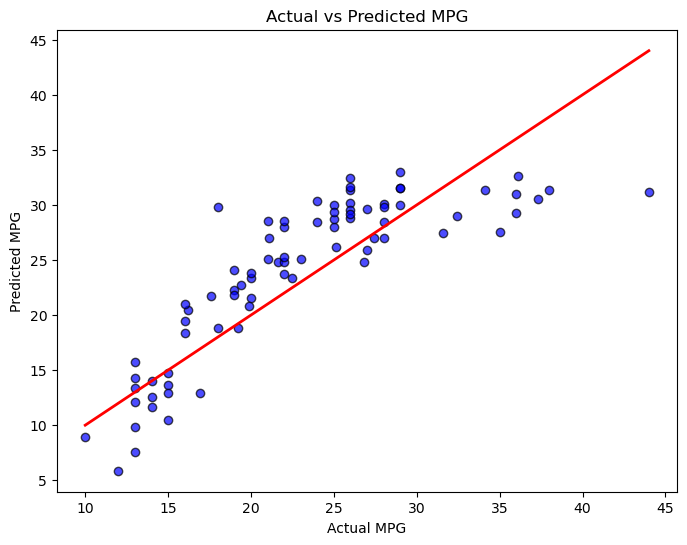

In [69]:
X = df[['weight','horsepower','displacement' ]]  # Independent variables
y = df['mpg']       # Dependent variable
# Split the data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)
# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

# Print the metrics
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}")
# Plot actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', edgecolor='black', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)  # Perfect prediction line
plt.title('Actual vs Predicted MPG')
plt.xlabel('Actual MPG')
plt.ylabel('Predicted MPG')
plt.show()

In [71]:
# 1. Initial Model Performance (without z-scores)
# We already have the initial model (simple linear regression using 'weight' to predict 'mpg')
# The predictions for initial model were made earlier (y_pred for mpg)
mse_initial = mean_squared_error(y_test, y_pred)
rmse_initial = np.sqrt(mse_initial)
mae_initial = mean_absolute_error(y_test, y_pred)

# 2. Model Using Z-Scores of Residuals
# We already have the second model (simple linear regression using 'weight' to predict z-scores)
mse_zscore = mean_squared_error(z_scores, z_pred)
rmse_zscore = np.sqrt(mse_zscore)
mae_zscore = mean_absolute_error(z_scores, z_pred)

# 3. Print Comparison
print("Comparison of Models:")
print("\nInitial Model (without z-scores):")
print(f"Mean Squared Error (MSE): {mse_initial:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_initial:.2f}")
print(f"Mean Absolute Error (MAE): {mae_initial:.2f}")

print("\nModel Using Z-Scores of Residuals:")
print(f"Mean Squared Error (MSE): {mse_zscore:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_zscore:.2f}")
print(f"Mean Absolute Error (MAE): {mae_zscore:.2f}")

Comparison of Models:

Initial Model (without z-scores):
Mean Squared Error (MSE): 18.01
Root Mean Squared Error (RMSE): 4.24
Mean Absolute Error (MAE): 3.51

Model Using Z-Scores of Residuals:
Mean Squared Error (MSE): 0.93
Root Mean Squared Error (RMSE): 0.97
Mean Absolute Error (MAE): 0.71
